### Lendo arquivos de treino e teste

In [1]:
import pickle

In [3]:
with open('../Bases/credit_data.pkl', 'rb') as file:
    X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = pickle.load(file)

In [4]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [5]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

### Random Forest - 98,4%

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
# Aumentar o numero de arvores poderá aumentar a precisão do modelo (n_estimators) porém, é mais demorado o treinamento.
random_forest_credit = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)
random_forest_credit.fit(X_credit_treinamento, y_credit_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40, random_state=0)

In [26]:
previsoes = random_forest_credit.predict(X_credit_teste)

In [11]:
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [27]:
accuracy_score(y_credit_teste, previsoes)

0.984

0.984

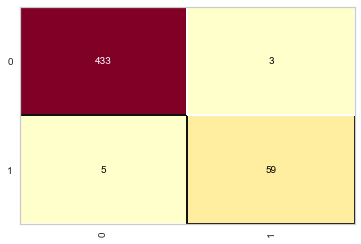

In [28]:
cm = ConfusionMatrix(random_forest_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [29]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.95      0.92      0.94        64

    accuracy                           0.98       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500

